José Delgado

# 4. Preprocessing

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data/training.csv')

## Split Features and Targets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Machine Failure', axis=1), df['Machine Failure'], test_size=0.3, random_state=1234)

## Rebalance Data

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
sm = SMOTE(random_state=1234)

In [19]:
X_train, y_train = sm.fit_resample(X_train, y_train)

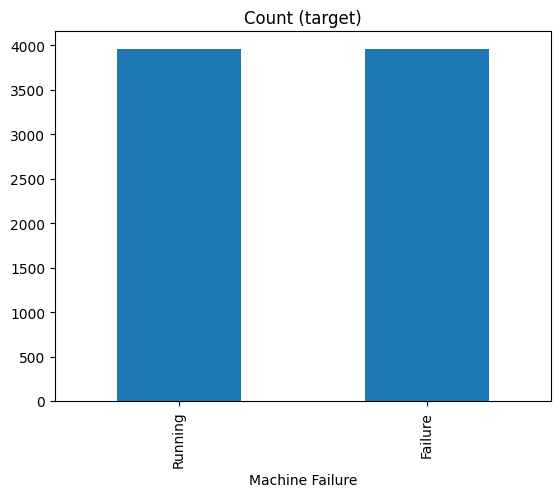

In [24]:
y_train.value_counts().plot(kind='bar', title='Count (target)')
plt.show()

# 5. Reducing Dimensionality

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Training a PCA Model

In [26]:
scaler = StandardScaler()

In [31]:
scaled_data = scaler.fit_transform(X_train)

In [35]:
temp_scaled_df = pd.DataFrame(scaled_data)

In [36]:
temp_scaled_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
count,7.918000e+03,7.918000e+03,7.918000e+03,7.918000e+03,7.918000e+03,7.918000e+03,7.918000e+03,7.918000e+03,7.918000e+03,7.918000e+03,...,7.918000e+03,7.918000e+03,7.918000e+03,7.918000e+03,7.918000e+03,7.918000e+03,7.918000e+03,7.918000e+03,7.918000e+03,7.918000e+03
mean,1.130694e-16,4.486883e-18,2.871605e-17,-1.408881e-16,-1.094799e-16,6.461111e-17,4.935571e-17,7.179012e-18,-6.820062e-17,1.076852e-16,...,1.920386e-16,-1.794753e-18,5.563734e-17,1.884491e-16,5.025309e-17,9.781404e-17,4.845833e-17,-7.179012e-17,1.722963e-16,2.388816e-15
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,...,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-3.475193e+00,-3.829305e+00,-3.555387e+00,-3.736258e+00,-3.645593e+00,-3.736258e+00,-4.193910e+00,-5.994339e+00,-3.727846e+00,-4.095714e+00,...,-3.948575e+00,-3.948575e+00,-3.527972e+00,-3.766304e+00,-3.948575e+00,-3.527972e+00,-3.519883e+00,-3.632377e+00,-3.789436e+00,-3.149074e+00
25%,-6.464624e-01,-6.532652e-01,-6.690047e-01,-6.466453e-01,-6.470952e-01,-6.466453e-01,-6.571715e-01,-4.414820e-01,-6.525892e-01,-6.778362e-01,...,-6.540125e-01,-6.540125e-01,-6.538802e-01,-6.485973e-01,-6.540125e-01,-6.538802e-01,-6.161674e-01,-6.875806e-01,-7.345368e-01,-6.609682e-01
50%,-2.198781e-02,-2.081976e-02,-1.384351e-02,1.717327e-03,5.053805e-03,1.717327e-03,-8.281096e-03,-2.383504e-01,-7.060073e-03,1.093127e-02,...,-4.226529e-03,-4.226529e-03,4.226529e-03,-2.216792e-02,-4.226529e-03,4.226529e-03,-2.054949e-01,1.493259e-02,2.128447e-01,-1.394482e-01
75%,6.499382e-01,6.672515e-01,6.584395e-01,6.570958e-01,6.472383e-01,6.570958e-01,6.553271e-01,2.894332e-01,6.398313e-01,6.483094e-01,...,6.538802e-01,6.538802e-01,6.540125e-01,6.492926e-01,6.538802e-01,6.540125e-01,4.589944e-01,6.906328e-01,7.168882e-01,5.074106e-01
max,3.790858e+00,3.899594e+00,3.878507e+00,3.978828e+00,4.151586e+00,3.978828e+00,3.867689e+00,1.126998e+01,4.065088e+00,4.238175e+00,...,3.527972e+00,3.527972e+00,3.948575e+00,4.189567e+00,3.527972e+00,3.948575e+00,6.627203e+00,4.259685e+00,2.729922e+00,6.121168e+00


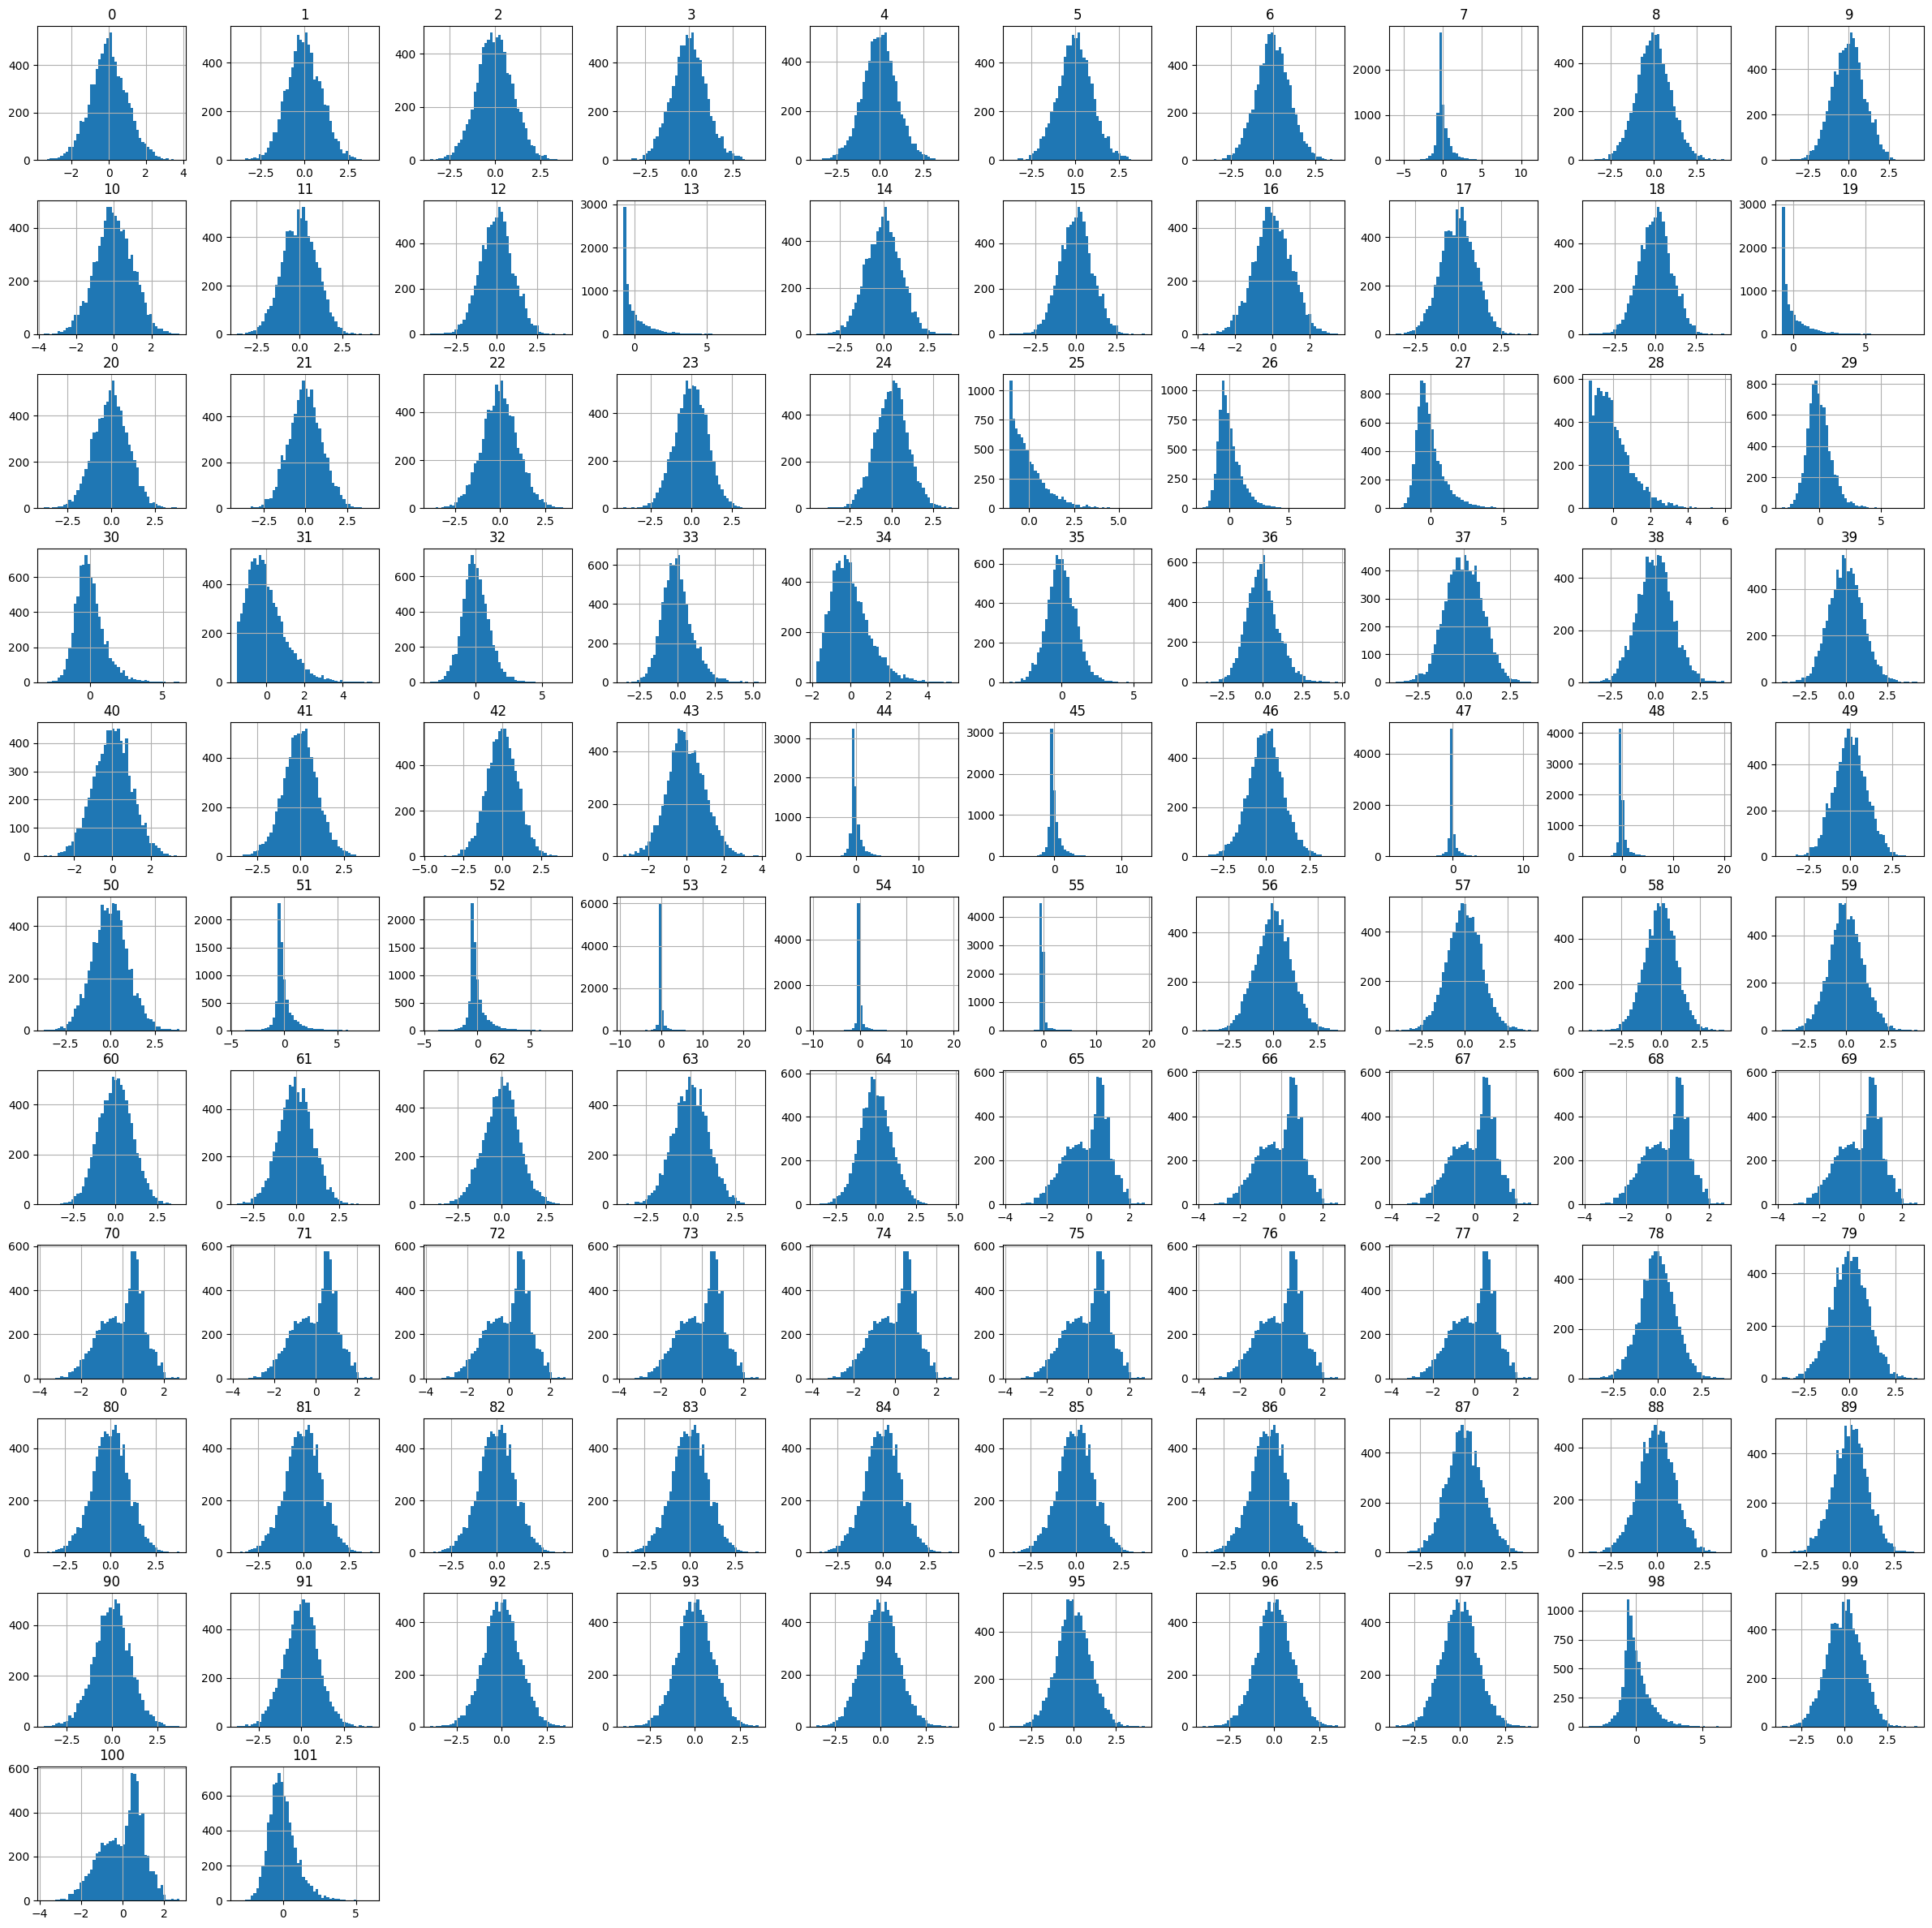

In [41]:
temp_scaled_df.hist(figsize=(30, 30), bins=50)
plt.show()

In [42]:
fit_pca = {}
for component in [*range(2, len(X_train.columns) - 1)]:
    pca = PCA(n_components=component)
    pca.fit(scaled_data)
    fit_pca[component] = pca

In [44]:
fit_pca[5].explained_variance_ratio_

array([0.13857708, 0.10187388, 0.07224793, 0.06127823, 0.04872047])

## Evaluating Components using a Scree Plot

In [47]:
scaled_data[0].shape

(102,)

In [50]:
scaled_data[0]

array([ 1.60755735, -0.46146099,  0.25417277,  0.04628206,  0.60076818,
        0.04628206, -0.13907527, -0.08320706, -0.20278523,  0.25039446,
        2.50544027, -1.46843135,  0.25039446,  4.54580759,  0.30928566,
        0.25039446,  2.50544027, -1.46843135,  0.25039446,  4.54580759,
        0.30928566,  0.52725576, -0.56457519, -0.26616693, -0.18314544,
       -0.74803427, -0.83818552, -0.74944515, -0.71532088, -0.86932589,
       -0.79433775, -0.69173847, -0.84727016, -0.78759887, -0.67410582,
       -0.81487775, -0.7670534 ,  0.67569003, -0.91924892, -1.51348988,
       -1.75595945,  0.60076818,  1.73118082, -1.65143778, -0.22443118,
       -1.47158839,  0.60076818, -0.33243297,  0.06100728,  0.52725576,
       -0.91924892, -1.21897029, -1.21897029, -0.13392128, -0.29657103,
       -0.1986071 , -0.33720001, -0.51744822, -0.0310227 , -0.15489966,
       -0.09319092, -0.34120098,  0.05557692, -0.12746693, -0.09679982,
       -2.18980976, -2.18980976, -2.18980976, -2.18980976, -2.18

In [49]:
fit_pca[5].transform(scaled_data)[0].shape

(5,)

In [51]:
fit_pca[5].transform(scaled_data)[0]

array([-7.57340169, -3.74405531,  1.41302935, -1.81733639,  3.04716016])

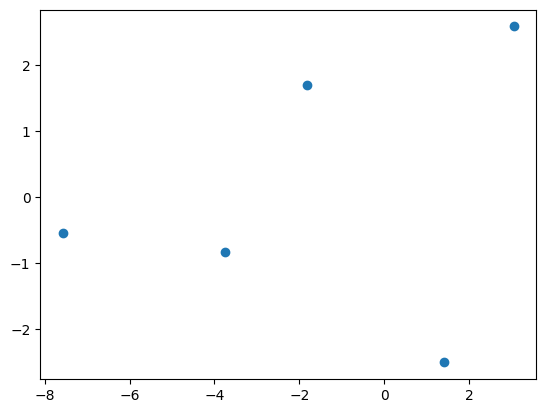

In [53]:
plt.plot(fit_pca[5].transform(scaled_data)[0], fit_pca[5].transform(scaled_data)[1], 'o')
plt.show()

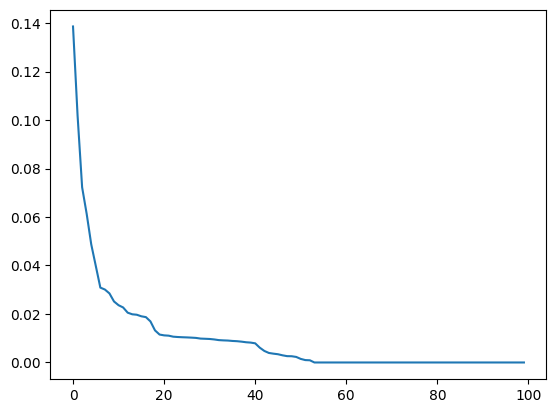

In [56]:
plt.plot(fit_pca[100].explained_variance_ratio_)
plt.show()

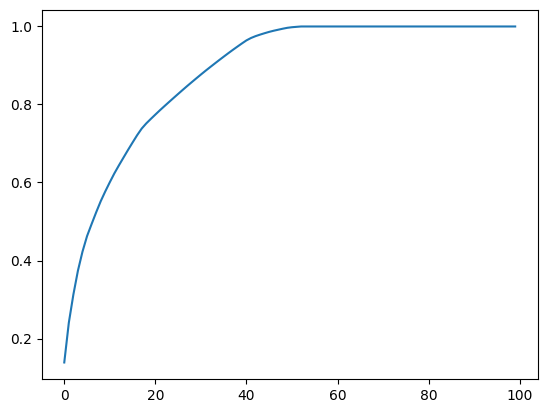

In [57]:
plt.plot(fit_pca[100].explained_variance_ratio_.cumsum())
plt.show()

In [58]:
fit_pca[100].explained_variance_ratio_.cumsum()

array([0.13857708, 0.24045096, 0.31269889, 0.37397711, 0.42269759,
       0.46250901, 0.49338716, 0.52346789, 0.55194668, 0.57710583,
       0.60072411, 0.62341834, 0.64396137, 0.66383667, 0.68352621,
       0.70257311, 0.72128001, 0.73821852, 0.75144862, 0.7629671 ,
       0.77414748, 0.78520518, 0.79584362, 0.80634498, 0.8167538 ,
       0.82709278, 0.83734067, 0.84747346, 0.85732757, 0.86710263,
       0.87679328, 0.88629523, 0.89552189, 0.90463863, 0.91368026,
       0.92255939, 0.93133808, 0.93992703, 0.94826732, 0.9564688 ,
       0.96436847, 0.9704765 , 0.97524227, 0.97916972, 0.98280313,
       0.98620303, 0.98915696, 0.99177165, 0.99434618, 0.99663597,
       0.99810642, 0.99909375, 0.99999965, 0.99999982, 0.99999993,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [62]:
fit_pca[20].explained_variance_ratio_.sum()

np.float64(0.7629671027006212)

In [63]:
fit_pca[30].explained_variance_ratio_.sum()

np.float64(0.8671026293604951)

In [64]:
fit_pca[40].explained_variance_ratio_.sum()

np.float64(0.9564687956555192)

In [65]:
fit_pca[50].explained_variance_ratio_.sum()

np.float64(0.9966359706366549)

In [66]:
fit_pca[45].explained_variance_ratio_.sum()

np.float64(0.9828031275198726)